In [2]:
# Ensure required libraries are installed
import sys
import subprocess

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

for pkg in ["pandas", "numpy", "matplotlib", "seaborn"]:
    try:
        __import__(pkg)
    except ImportError:
        print(f"Installing {pkg}...")
        install(pkg)


Installing pandas...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 29.7 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 15.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [pandas]2m3/4 [pandas]



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


Installing matplotlib...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 19.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


Installing seaborn...



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


# Online Retail Dataset Analysis

This notebook analyzes the online retail dataset to understand customer behavior, sales patterns, and product performance. We'll explore various aspects of the data to gain meaningful insights.

## 1. Import Required Libraries

First, let's import the necessary Python libraries for our analysis.

In [12]:
import pandas as pd
import numpy as np
import zipfile
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

## 2. Extract and Read the CSV File

Let's extract the CSV file from the ZIP archive and read it into a pandas DataFrame.

In [4]:
# Read the CSV file from the ZIP archive
with zipfile.ZipFile('online_retail.csv.zip', 'r') as zip_ref:
    df = pd.read_csv(zip_ref.open('online_retail.csv'))

print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset loaded with 541909 rows and 8 columns.


## 3. Basic Information About the Dataset

Let's examine the structure and basic statistics of our dataset.

In [5]:
# Display basic information about the dataset
print("\nDataset Info:")
df.info()

print("\nBasic Statistics:")
df.describe()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB

Basic Statistics:


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## 4. Preview the Data

Let's look at the first few rows of our dataset to understand its structure.

In [6]:
# Display the first few rows of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
# Find range for continuous numeric variables
numeric_cols = ['Quantity', 'UnitPrice']
for col in numeric_cols:
    print(f"{col}: min={df[col].min()}, max={df[col].max()}")

# Find unique values for nominal variables
nominal_cols = ['InvoiceNo', 'StockCode', 'Description', 'Country']
for col in nominal_cols:
    unique_vals = df[col].unique()
    print(f"\n{col}: {len(unique_vals)} unique values")
    # Show up to 20 unique values for preview
    print(unique_vals[:20])

Quantity: min=-80995, max=80995
UnitPrice: min=-11062.06, max=38970.0

InvoiceNo: 25900 unique values
['536365' '536366' '536367' '536368' '536369' '536370' '536371' '536372'
 '536373' '536374' '536375' '536376' '536377' '536378' '536380' '536381'
 'C536379' '536382' 'C536383' '536384']

StockCode: 4070 unique values
['85123A' '71053' '84406B' '84029G' '84029E' '22752' '21730' '22633'
 '22632' '84879' '22745' '22748' '22749' '22310' '84969' '22623' '22622'
 '21754' '21755' '21777']

Description: 4224 unique values
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.' 'SET 7 BABUSHKA NESTING BOXES'
 'GLASS STAR FROSTED T-LIGHT HOLDER' 'HAND WARMER UNION JACK'
 'HAND WARMER RED POLKA DOT' 'ASSORTED COLOUR BIRD ORNAMENT'
 "POPPY'S PLAYHOUSE BEDROOM " "POPPY'S PLAYHOUSE KITCHEN"
 'FELTCRAFT PRINCESS CHARLOTTE DOLL' 'IVORY KNITTED MUG COSY '
 'BOX OF 6 ASSORTED COLOUR TEASPOONS' '

## 5. Key Questions for Data Understanding

Based on our initial exploration, here are some key questions we should investigate:

### Data Quality Questions:
1. Are there any missing values in the dataset?
2. Are there any duplicate transactions?
3. Are there any negative quantities or prices that need investigation?

### Business Analysis Questions:
1. What is the distribution of order quantities?
2. What are the top-selling products?
3. Who are our most valuable customers?
4. What are the sales trends over time?
5. Which countries generate the most revenue?

Let's start addressing these questions one by one.

In [10]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check for duplicate transactions
print(f"\nNumber of duplicate transactions: {df.duplicated().sum()}")

# Check for negative quantities and prices
print(f"\nTransactions with negative quantities: {(df['Quantity'] < 0).sum()}")
print(f"Transactions with negative prices: {(df['UnitPrice'] < 0).sum()}")

Missing values in each column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalAmount         0
Month               0
dtype: int64

Number of duplicate transactions: 5268

Transactions with negative quantities: 10624
Transactions with negative prices: 2


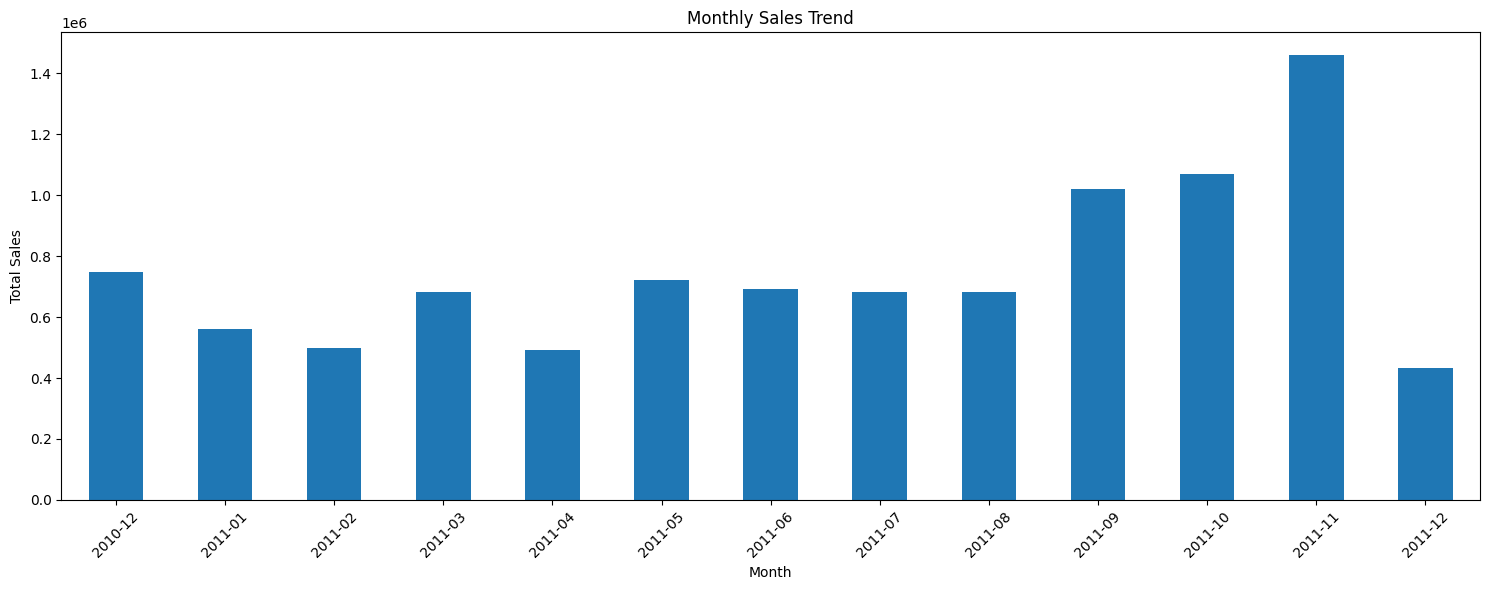

In [11]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Add a TotalAmount column
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Basic time-based analysis
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalAmount'].sum()

# Plot monthly sales
plt.figure(figsize=(15, 6))
monthly_sales.plot(kind='bar')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Customer analysis
customer_stats = df.groupby('CustomerID').agg({
    'InvoiceNo': 'count',
    'TotalAmount': 'sum',
    'Quantity': 'sum'
}).rename(columns={
    'InvoiceNo': 'NumberOfOrders',
    'TotalAmount': 'TotalSpent',
    'Quantity': 'ItemsPurchased'
})

# Display top 10 customers by total spend
print("Top 10 Customers by Total Spend:")
print(customer_stats.sort_values('TotalSpent', ascending=False).head(10))

Top 10 Customers by Total Spend:
            NumberOfOrders  TotalSpent  ItemsPurchased
CustomerID                                            
14646.0               2085   279489.02          196719
18102.0                433   256438.49           64122
17450.0                351   187482.17           69029
14911.0               5903   132572.62           77180
12415.0                778   123725.45           77242
14156.0               1420   113384.14           57025
17511.0               1076    88125.38           63012
16684.0                281    65892.08           49390
13694.0                585    62653.10           61803
15311.0               2491    59419.34           37720


In [14]:
# Show top 10 transactions with highest quantity
print("Top 10 transactions with highest Quantity:")
high_qty = df.sort_values('Quantity', ascending=False).head(10)
display_cols = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'CustomerID', 'Country']
print(high_qty[display_cols])

Top 10 transactions with highest Quantity:
       InvoiceNo StockCode                          Description  Quantity  \
540421    581483     23843          PAPER CRAFT , LITTLE BIRDIE     80995   
61619     541431     23166       MEDIUM CERAMIC TOP STORAGE JAR     74215   
502122    578841     84826       ASSTD DESIGN 3D PAPER STICKERS     12540   
74614     542504     37413                                  NaN      5568   
421632    573008     84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS      4800   
206121    554868     22197                 SMALL POPCORN HOLDER      4300   
220843    556231    85123A                                    ?      4000   
97432     544612     22053                EMPIRE DESIGN ROSETTE      3906   
270885    560599     18007  ESSENTIAL BALM 3.5g TIN IN ENVELOPE      3186   
160546    550461     21108   FAIRY CAKE FLANNEL ASSORTED COLOUR      3114   

        UnitPrice  CustomerID         Country  
540421       2.08     16446.0  United Kingdom  
61619        